<a href="https://colab.research.google.com/github/thevivekrathi/happy_sad_cnn/blob/main/Happy_or_Sad_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Happy or Sad**

#### We have a **happy or sad dataset** which contains **80 images, 40 happy and 40 sad**. 

#### Our objective is to create a convolutional neural network that trains on these images and cancels training upon hitting training accuracy of >.999

#### Also, to test the accuracy of the model, we will upload real world images to see if our convolutional neural network can classify them correctly.

#### You can also download the [dataset](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip).

#### In this block we are downloading the dataset as a zip file and then extracting the contents to a temp directory. This temp directory will have two sub-directories i.e. happy and sad with the happy and sad images respectively. 

#### We are also defining a callback function that will check the accuracy score of our model during training and as soon as it hits 99.9%(accuracy >=0.999), it will stop the training.

In [ ]:
import tensorflow as tf
import os
import zipfile


!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.999):
      print("Reached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

--2021-06-13 12:15:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2021-06-13 12:15:53 (107 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



#### In this block, we are defining our happy and sad directories and looking inside for filenames and number of files.

In [ ]:
train_dir = "/tmp/h-or-s"
train_happy_dir = "/tmp/h-or-s/happy"
train_sad_dir = "/tmp/h-or-s/sad"

print('Train happy directory')
print('Number of images:', len(os.listdir(train_happy_dir)))
print('Image labels inside the directory:\n',os.listdir(train_happy_dir)[:5])

print('\nTrain sad directory')
print('Number of images:', len(os.listdir(train_sad_dir)))
print('Image labels inside the directory:\n',os.listdir(train_sad_dir)[:5])

Train happy directory
Number of images: 40
Image labels inside the directory:
 ['happy1-07.png', 'happy2-02.png', 'happy2-19.png', 'happy2-09.png', 'happy2-04.png']

Train sad directory
Number of images: 40
Image labels inside the directory:
 ['sad1-08.png', 'sad2-13.png', 'sad2-09.png', 'sad1-03.png', 'sad2-08.png']


#### It is time to look at the images in our dataset, so in this block, we will display the images to get an idea of what we are dealing with.

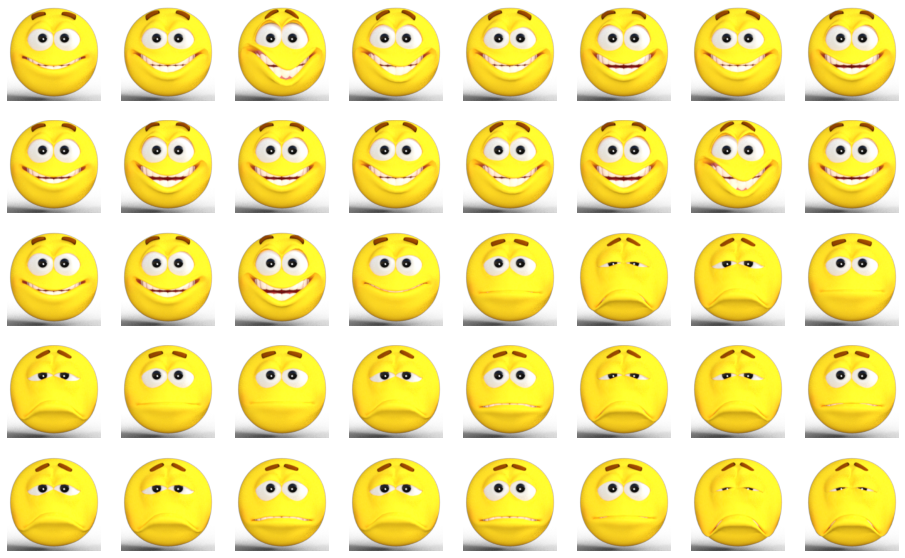

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 5
ncols = 8

image_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)

image_index = 20

next_happy_pic = [os.path.join(train_happy_dir, fname) 
                for fname in os.listdir(train_happy_dir)[0:image_index]]

next_sad_pic = [os.path.join(train_sad_dir, fname) 
                for fname in os.listdir(train_sad_dir)[0:image_index]]

for i, img_path in enumerate(next_happy_pic+next_sad_pic):
  sub_plot = plt.subplot(nrows, ncols, i + 1)
  sub_plot.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


#### Now this is an important part, so we are creating an image generator that will rescale the images and will help us generate images from the directory for our model training.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.0)

train_generator = train_datagen.flow_from_directory(
    "/tmp/h-or-s",
    target_size = (300,300),
    batch_size = 16,
    class_mode = 'binary')

Found 80 images belonging to 2 classes.


#### It's time for our model definitiona and compilation.

#### We are using three layers of Convolution and Pooling to reduce the size of the input image. 

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.summary()

from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = 'accuracy')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 39200)             0

#### Let's fit the model.

In [ ]:
history = model.fit(
    train_generator,
    epochs = 100,
    callbacks = callbacks
)

Epoch 1/100
5/5 [==============================] - 6s 1s/step - loss: 1.6312 - accuracy: 0.5750
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 1.1226 - accuracy: 0.8625
Epoch 3/100
5/5 [==============================] - 5s 1s/step - loss: 0.7624 - accuracy: 0.7250
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 0.1561 - accuracy: 0.9750
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 0.1167 - accuracy: 0.9375
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: 0.0579 - accuracy: 0.9875
Epoch 7/100
5/5 [==============================] - 6s 1s/step - loss: 0.0183 - accuracy: 1.0000
Reached 99.9% accuracy so cancelling training!


#### Now the model if fitted and trained, let's try it's accuracy on the real world images. 

#### This block will allow you to upload and image and test if it is a happy image or sad. 

#### Try with multiple images and also keep in mind the kind of images our model is trained on. You will notice that it performs very good on images similar to what it is trained on. 

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is happy")
  else:
    print(fn + " is sad")
 

Saving emoji-4827099_1280.png to emoji-4827099_1280.png
[0.]
emoji-4827099_1280.png is sad


### Some sad images to try the model:

https://pixabay.com/illustrations/emoji-smiley-sad-sadness-emotion-4828792/

https://pixabay.com/illustrations/emoji-smiley-comic-yellow-face-4827099/